
 Dataset Information:
Form: (13204, 22)
loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                 bool
dtype: object

🔎 Kontroll av saknade värden per kolumn:
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t           

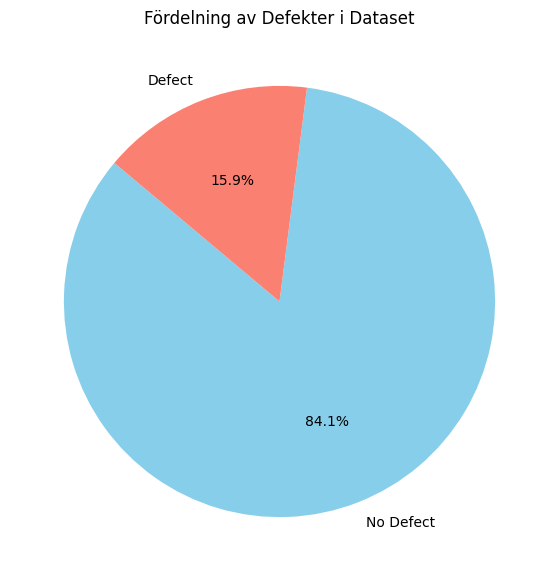

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/JM1.csv')

print("\n Dataset Information:")
print(f"Form: {df.shape}")
print(df.dtypes)

print("\n🔎 Kontroll av saknade värden per kolumn:")
print(df.isnull().sum())

print("\nFördelning av 'defects' (innan konvertering):")
print(df['defects'].value_counts(normalize=True) * 100)

df['defects'] = df['defects'].astype(int)

print("\n Fördelning av 'defects' (efter konvertering):")
print(df['defects'].value_counts())

X = df.drop('defects', axis=1)
y = df['defects']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("\n Tränings- och testdata:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print("\n Label distribution i y_train:")
print(y_train.value_counts(normalize=True) * 100)
print("\n Label distribution i y_test:")
print(y_test.value_counts(normalize=True) * 100)

labels = ['No Defect', 'Defect']
sizes = y.value_counts(normalize=True) * 100
colors = ['skyblue', 'salmon']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Fördelning av Defekter i Dataset')
plt.show()
